# Penguins Species Dataset

## Overview

The "Penguins Species" dataset contains information about various penguin species, with measurements related to their physical characteristics. 


## Objective

The objective of analyzing this dataset could be to understand the relationships between the physical characteristics of penguins and their gender, explore patterns or clusters within the data, or build predictive models.



# Import Dependencies

In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns

# 1 Data Overview

#### 1.1 Load the dataset into a dataframe and inital inspection

In [2]:
df = pd.read_csv("../Dataset/penguins_size.csv")
df = df[df['sex'] != '.'] #There is a row where sex = '.', so filtering it out
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 343 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            343 non-null    object 
 1   island             343 non-null    object 
 2   culmen_length_mm   341 non-null    float64
 3   culmen_depth_mm    341 non-null    float64
 4   flipper_length_mm  341 non-null    float64
 5   body_mass_g        341 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 21.4+ KB


# 3. Data Exploration and Visualization

In [4]:
def annotate_bars():
    for p in plt.gca().patches:
        plt.gca().annotate(f'{round(p.get_height(),2)}', (p.get_x() + p.get_width() / 2., p.get_height()),
                           ha='center', va='center', xytext=(0, 4), textcoords='offset points')


#### 3.1 Gender Distribution

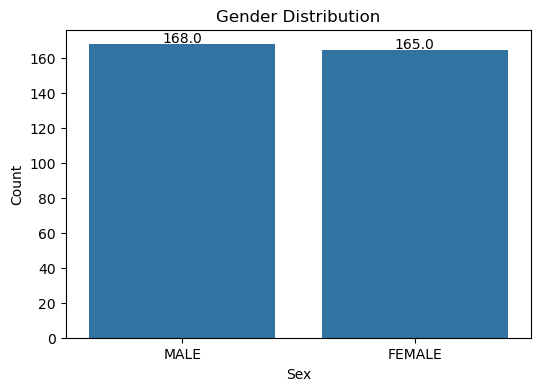

In [5]:

plt.figure(figsize=(6, 4))
sns.countplot(x='sex', data=df)
annotate_bars()
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Gender Distribution')
plt.show()

#### Observation: Gender Distribution in the Dataset 📊

In the dataset:
- 🚹 **Males:** 168
- 🚺 **Females:** 165

So, there are 🚹 **168 - 165 = 3** more male penguins than females penguins in the dataset. While it's not perfectly uniform, the difference isn't drastic to worry about.

#### 3.2 Target Distribution

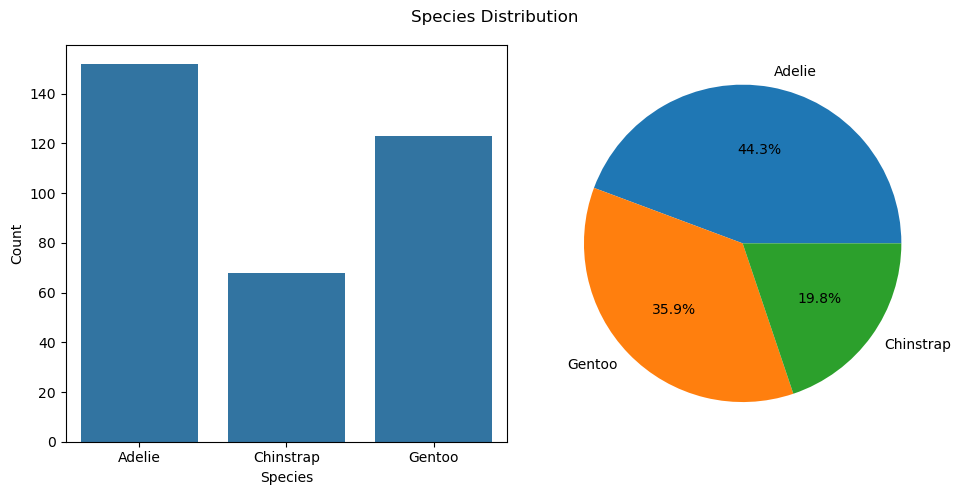

In [7]:
# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
plt.suptitle("Species Distribution")
# Bar chart for species distribution
sns.countplot(ax=axes[0], x='species', data=df)
annotate_bars()
axes[0].set_xlabel('Species')
axes[0].set_ylabel('Count')



# Pie chart for species distribution
species_counts = df['species'].value_counts()
axes[1].pie(species_counts, labels=species_counts.index, autopct='%1.1f%%')

plt.tight_layout()
plt.show()

#### Penguin Species Distribution 🐧

In the dataset, the distribution of penguin species is as follows:

- 🐧 **Adelie Species:** 152
- 🐧 **Chinstrap Species:** 68
- 🐧 **Gentoo Species:** 123

Among these species:
- The **highest** count is for the **Adelie species** with 152 individuals.
- The **lowest** count is for the **Chinstrap species** with 68 individuals, which is almost half of the counts for the other species, indicating a substantial difference.

**Dataset Imbalance Consideration:**
    `The dataset exhibits a notable imbalance in the number of observations among penguin species, with the Chinstrap species having significantly fewer instances compared to Adelie and Gentoo. Model training and evaluation should account for this imbalance to ensure robust predictions across all species.`



## 3.3 Island Distribution

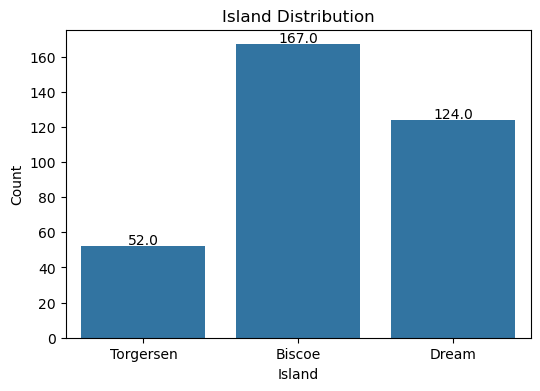

In [8]:
plt.figure(figsize=(6,4))
plt.title("Island Distribution")
sns.countplot(data = df, x = 'island')
annotate_bars()
plt.xlabel("Island")
plt.ylabel("Count")
plt.show()

## Observation:
In the dataset, the distribution of penguins across different islands is as follows:

- 🐧 **Torgersen Island:** 52
- 🐧 **Biscoe Island:** 167
- 🐧 **Dream Island:** 124

Among these islands:
- The **highest** count is for **Biscoe Island** with 168 individuals.
- The **lowest** count is for **Torgersen Island** with 52 individuals, which is less than half of the counts for the other islands, indicating a substantial difference.

## 3.4 Body Measurement and Mass Distribtion

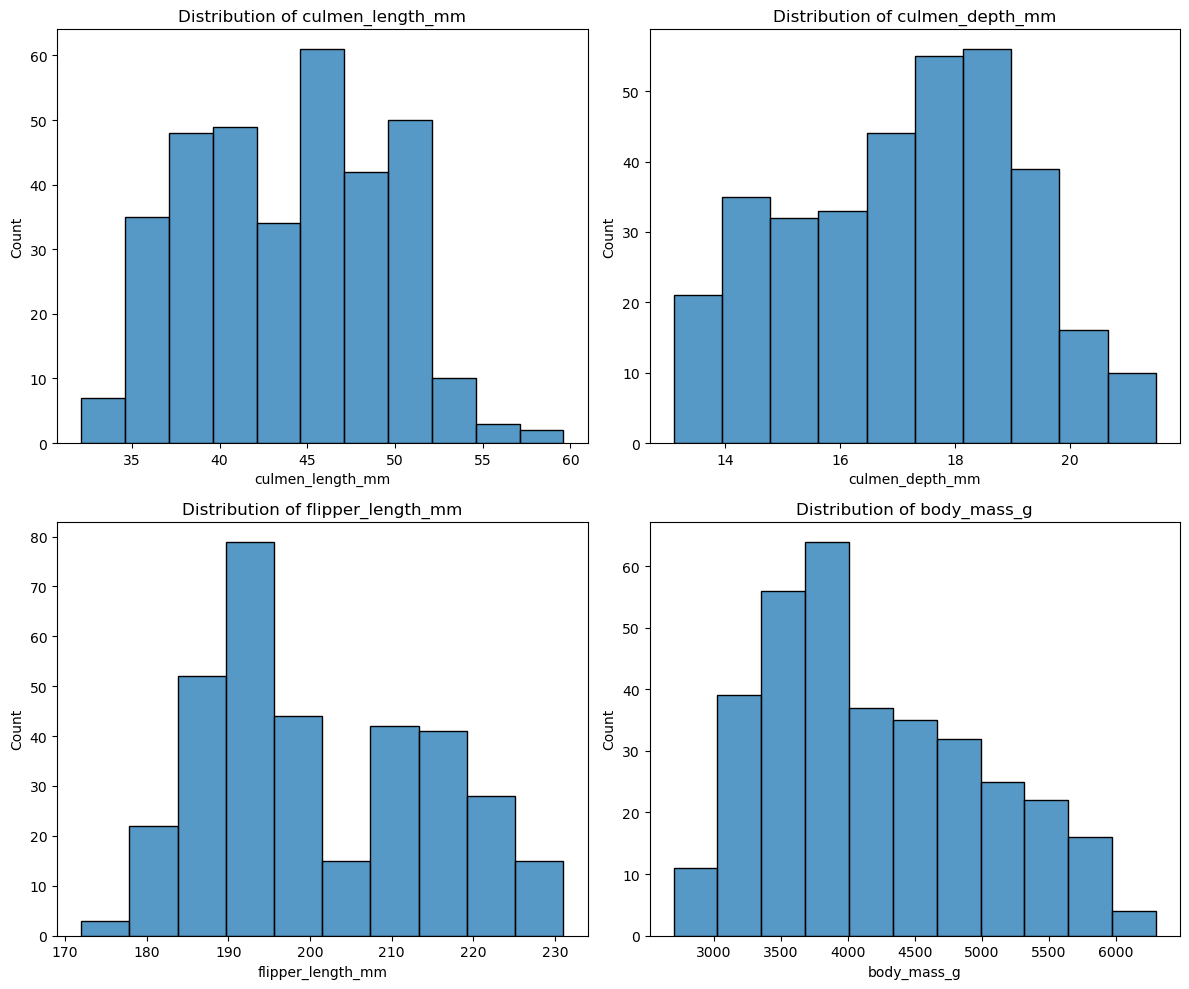

In [9]:
measured_features = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']

plt.figure(figsize=(12, 10))

for i, feature in enumerate(measured_features):
    plt.subplot(2, 2, i + 1)
    sns.histplot(data=df, x=feature)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()


#### 3.5 Average Measurements by Sex

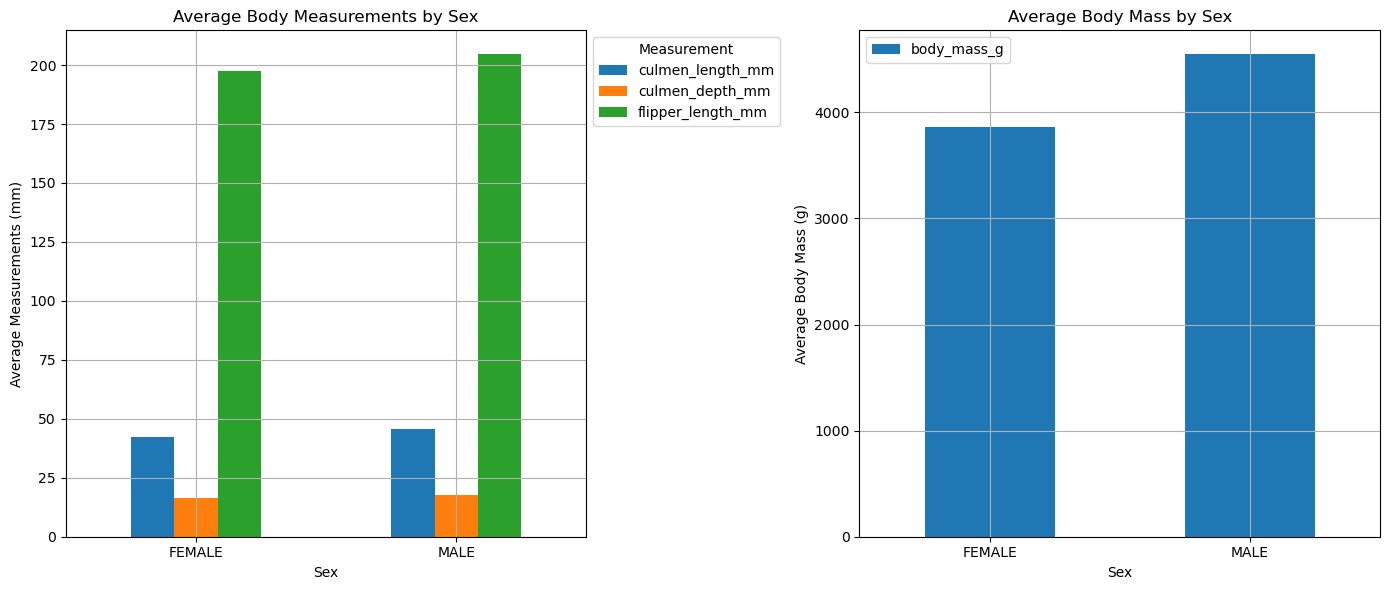

In [10]:
# Generate average measurements by sex
average_measurements_by_sex = (
    df.groupby("sex")[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']]
    .mean()
    .reset_index()
)


# Set the figure size
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plotting average body measurements (culmen length, depth, and flipper length)
average_measurements_by_sex.set_index('sex')[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm']].plot(
    kind='bar', rot=0, ax=axes[0]
)
annotate_bars()
axes[0].set_title('Average Body Measurements by Sex')
axes[0].set_xlabel('Sex')
axes[0].set_ylabel('Average Measurements (mm)')
axes[0].legend(title='Measurement', bbox_to_anchor=(1, 1))
axes[0].grid()

# Plotting average body mass
average_measurements_by_sex.set_index('sex')[['body_mass_g']].plot(
    kind='bar', rot=0, ax=axes[1]
)
axes[1].set_title('Average Body Mass by Sex')
axes[1].set_xlabel('Sex')
axes[1].set_ylabel('Average Body Mass (g)')
axes[1].grid()

# Adjust layout
plt.tight_layout()
plt.show()

#### Gender Comparison in Penguin Body Measurements

Upon analyzing the body measurements of male and female penguins, a noteworthy observation emerges. Both genders exhibit almost similar body measurements, with a slight distinction in weight. Males tend to be slightly heavier compared to females.

This insight provides valuable information about the physical characteristics of male and female penguins in the dataset.


## 3.6 Average Measurement by Species

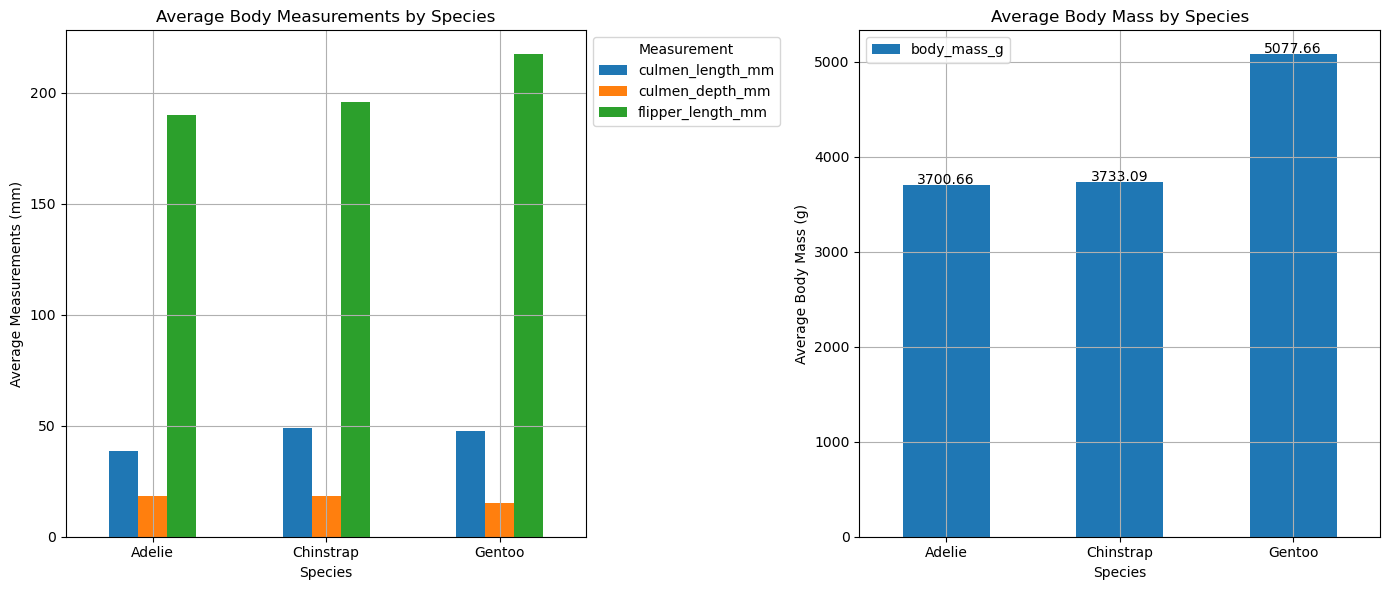

In [11]:
# Generate average measurements by species
average_measurements_by_species = (
    df.groupby("species")[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']]
    .mean()
    .reset_index()
)


# Set the figure size
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plotting average body measurements (culmen length, depth, and flipper length)
average_measurements_by_species.set_index('species')[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm']].plot(
    kind='bar', rot=0, ax=axes[0]
)
axes[0].set_title('Average Body Measurements by Species')
axes[0].set_xlabel('Species')
axes[0].set_ylabel('Average Measurements (mm)')
axes[0].legend(title='Measurement', bbox_to_anchor=(1, 1))
axes[0].grid()

# Plotting average body mass
average_measurements_by_species.set_index('species')[['body_mass_g']].plot(
    kind='bar', rot=0, ax=axes[1]
)
annotate_bars()
axes[1].set_title('Average Body Mass by Species')
axes[1].set_xlabel('Species')
axes[1].set_ylabel('Average Body Mass (g)')
axes[1].grid()

# Adjust layout
plt.tight_layout()
plt.show()

## 3.7 Average Measurement by Island

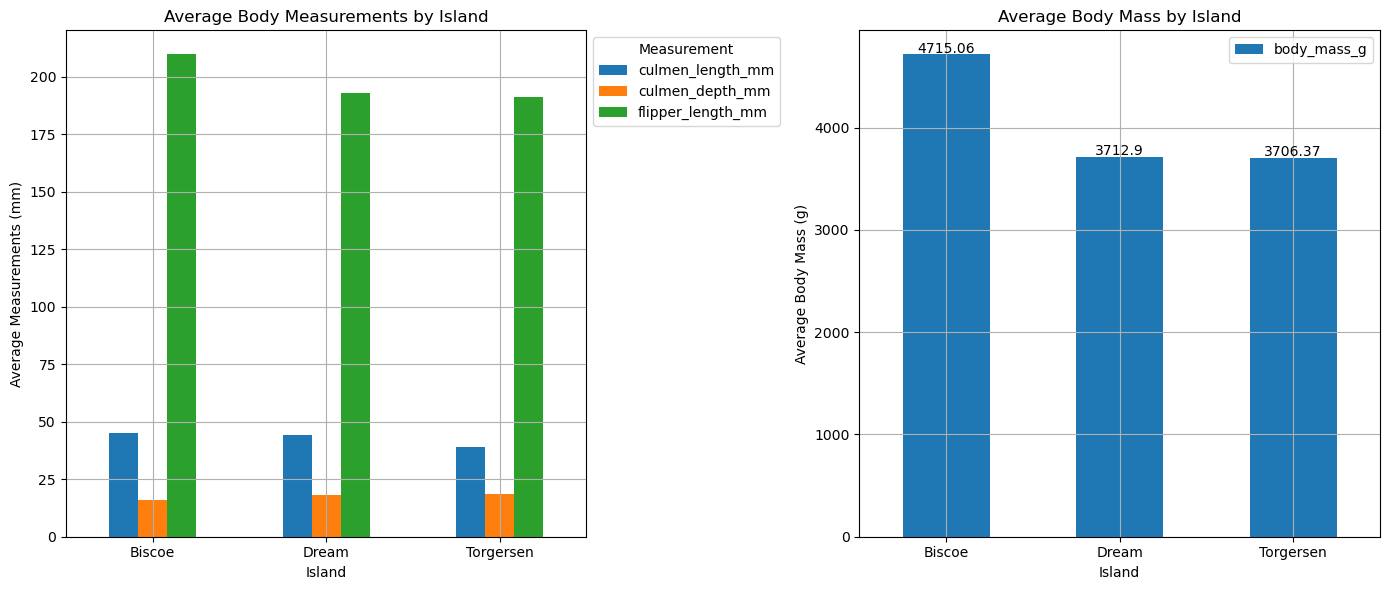

In [12]:
# Generate average measurements by island
average_measurements_by_island = (
    df.groupby("island")[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']]
    .mean()
    .reset_index()
)


# Set the figure size
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plotting average body measurements (culmen length, depth, and flipper length)
average_measurements_by_island.set_index('island')[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm']].plot(
    kind='bar', rot=0, ax=axes[0]
)
axes[0].set_title('Average Body Measurements by Island')
axes[0].set_xlabel('Island')
axes[0].set_ylabel('Average Measurements (mm)')
axes[0].legend(title='Measurement', bbox_to_anchor=(1, 1))
axes[0].grid()

# Plotting average body mass
average_measurements_by_island.set_index('island')[['body_mass_g']].plot(
    kind='bar', rot=0, ax=axes[1]
)
annotate_bars()
axes[1].set_title('Average Body Mass by Island')
axes[1].set_xlabel('Island')
axes[1].set_ylabel('Average Body Mass (g)')
axes[1].grid()

# Adjust layout
plt.tight_layout()
plt.show()

#### Insights: 📊

A closer examination of the penguin measurements across the three islands reveals a remarkable consistency in most attributes. Notably, the body mass stands out as significantly larger for penguins from `Biscoe Island`.


## 3.8 <span style="color: red;">🐧 The Million-Dollar Question! 💰</span>  
#### <span style="color: blue;">Does flipper length contribute to body mass?</span>  
For example, could the difference in male and female body mass be partially explained by the slightly larger flipper size in males?